We often design frac treatments around historical success, relying on the successes and failures of "wildcatters" of the past to hone in what kind of treament works in a formation. Once we have a treatment design that tends to "work", we strive for continious improvment, iterating the baseline treatment in a controlled fashion and collecting data to evaluate the efficacy of our adjustments. These experiments are conducted by brilliant scientists and engineeers in the lab and field, leveraging proprietary simulation software, Excel, SpotFire, and various programming languages.

But truthfully, the full power of the data is just beginning to be leveraged because it is *finally* being collected in ways that enable completions and field engineers to use it. Platforms, like Well Data Labs, collect it elegantly, allowing engineers to navigate their data with ease, throw together quick visuals that drive decisions, and extract the data in a format ready for advanced analytics. Now, let's talk advanced analytics.

We're coming into an era where the scale of the data were collecting is allowing computers to run statistical learning algorithms to learn patterns in data at scale in ways humans can't fathom (i.e processing 100+ million rows of data, synthesizing data in more than 3 dimensions, combining varibales in non-linear fashions). We can now teach a robot to cook by watching YouTube videos and diagnose brain tumors with superior accuracy to medical professionals. So it doesn't seem unfathomable that we could generate novel frac treatments that have high production potential or use time series data to find pressure patterns that are likely to lead to screen outs (if we don't take action). Well Data Labs is enabling leaders in the oil and gas industry to store and navigate their data with ease, allowing engineers, software engineers, and analyst to take the leap into advanced analytics and for the ambitious to begin to employ machine learning.

The realm of machine learning in oil & gas isn't limit to oil & gas production either. We're learning ways to predict field equipment failure from vibrational data, we're creating vehicle routing optimization algorithms to prioritize which wells completion engineers should travel to next, and we're using natural language processing to analyze engineerig/treater notes to predict which wellsites are at high risk candidates for safety incidents. Data science is moving the oil & gas industry from being reactive to proactive. But here's the catch -- we need people with oil & gas domain expertise building these algorithms! The oilfield is a complex and nunaced place and building predictive models and developing meaningful statistics is difficult with substantive expertise. Platforms like Tableau will take you far, but if you're looking to elevate your skillset you need to learn programming. Python and R and the languages of data science.

Here's how to get started with Python, with data extracted from Well Data Labs:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [19]:
# data frame set up
xlsx = pd.ExcelFile('FracStats_JobList_Summer2017.xlsx')
df_stats = xlsx.parse('FracStats')

relevant_cols = ['Well', 'System', 'Formation.1', 'Fluid Type', '100 Mesh, White [lbs]', 
                '30/50, White [lbs]', '40/70, White [lbs]', '20/40, White [lbs]', 
                'Total Proppant [lbs]', 'Screen Out']
df_stats = df_stats[relevant_cols]

df_stats.head()

,Well,System,Formation.1,Fluid Type,"100 Mesh, White [lbs]","30/50, White [lbs]","40/70, White [lbs]","20/40, White [lbs]",Total Proppant [lbs],Screen Out
0,P2,Sliding Sleeve,Nio C,Gel,7412.0,NaN,NaN,163021.0,NaN,No
1,P2,Sliding Sleeve,Nio C,Gel,6165.0,NaN,NaN,213117.0,NaN,No
2,P2,Sliding Sleeve,Nio C,Gel,5880.0,NaN,NaN,205057.0,NaN,No
3,P2,Sliding Sleeve,Nio C,Gel,6607.0,NaN,NaN,208468.0,NaN,No
4,P2,Sliding Sleeve,Nio C,Gel,6461.0,NaN,NaN,203365.0,NaN,No


You've been struggling on your last few stages. You haven't screened out, but you've had run-ins with high pressure and you don't want to push your luck. What are your options? Maybe you run some additional 100 Mesh to reduce tortusity -- it's expensive though, and you're already over-budget on this well. However, you can't afford to push your luck and potentially screen out with another pad to frac in just a couple days. You decide 100 Mesh is worth the added cost, but you want to use at little as possible with being certain you reap the benefits. You can obviously adjust on the fly depending on how pressure is looking, but you want to go in with a goal and you want to be proactive instead of reactive. You don't want to use that precious 100 Mesh frivously. So how much is enough?

Do you double your 100 Mesh, triple it? What's the call? We know no two wells are the same, but there's power in the data you have at your disposal from Well Data Labs. Let's use it.

The upcoming stage is in the Nio C. You're running Gel. You run a quick query of these parameters and come up with 94 stages in your database with these conditions.

In [17]:
nioc_df = df_stats.loc[(df_stats['Formation.1'] == 'Nio C') & (df_stats['Fluid Type'] == 'Gel')]

In [28]:
print("You have {} historical stages in the Nio C.".format(nioc_df.shape[0]))
nioc_df.head()

You have 94 historical stages in the Nio C.


,Well,System,Formation.1,Fluid Type,"100 Mesh, White [lbs]","30/50, White [lbs]","40/70, White [lbs]","20/40, White [lbs]",Total Proppant [lbs],Screen Out
0,P2,Sliding Sleeve,Nio C,Gel,7412.0,NaN,NaN,163021.0,NaN,No
1,P2,Sliding Sleeve,Nio C,Gel,6165.0,NaN,NaN,213117.0,NaN,No
2,P2,Sliding Sleeve,Nio C,Gel,5880.0,NaN,NaN,205057.0,NaN,No
3,P2,Sliding Sleeve,Nio C,Gel,6607.0,NaN,NaN,208468.0,NaN,No
4,P2,Sliding Sleeve,Nio C,Gel,6461.0,NaN,NaN,203365.0,NaN,No


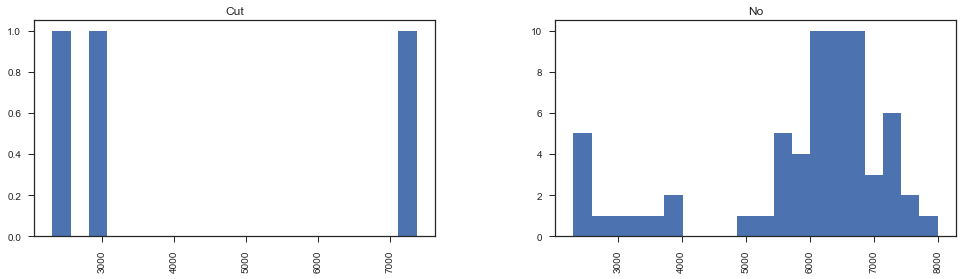

In [15]:
nioc_df.hist('100 Mesh, White [lbs]', bins=20, by='Screen Out', figsize=(16,4));

On the left, is a histogram of stages we've had to cut treament early, with the lbs of 100 Mesh pumped during that stage. On the right, is the same historgram, but for stages we successfully pumped the entirety of the design treatment.

From these graphs, we determine that it's probably wise to pump more than 3,000 lbs of 100 Mesh.

Somewhere in the 3,000 - 8,000 lbs range seems like a good bet, but that's still a large range, so let's see if we can narrow it even more.

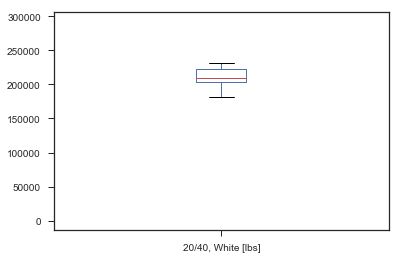

In [22]:
nioc_df['20/40, White [lbs]'].plot(kind='box')

KeyError: "['P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2'\n 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P2' 'P5'\n 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5' 'P5'\n 'P3' 'P3' 'P3' 'P3' 'P3' 'P3' 'P3' 'P3' 'P7' 'P7' 'P7' 'P7' 'P7' 'P7' 'P7'\n 'P7' 'P7' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6'\n 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P6' 'P10' 'P10'\n 'P10' 'P10' 'P10' 'P10' 'P10'] not in index"

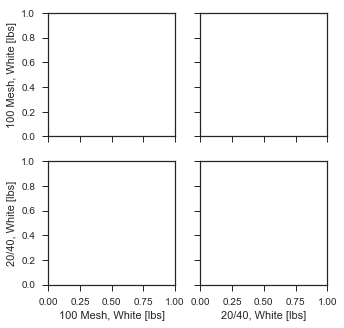

In [25]:
sns.pairplot(nioc_df[['100 Mesh, White [lbs]', '20/40, White [lbs]']], hue=nioc_df['Well'], diag_kind="kde", plot_kws={"s": 40, "alpha": 0.6});

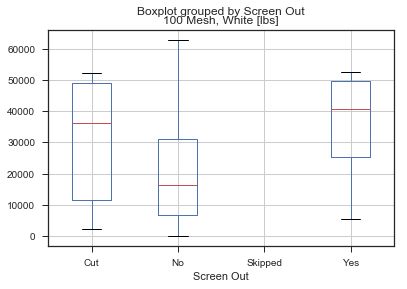

In [26]:
df_stats.boxplot(column='100 Mesh, White [lbs]', by='Screen Out');

In [ ]:
# let's look at successful stages vs. unsuccessful stages
success_df = df_stats.loc[df_stats['Screen Out'] == 'No']
unsuccessful_df = df_stats.loc[df_stats['Screen Out'] != 'No']

In [ ]:
unsuccessful_df.shape

In [ ]:
success_df.shape

All that insight from X lines of code.

In [ ]:
df_stats["Formation.1"]